In [1]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import cppyy
import cppyy.ll
cppyy.add_include_path("jupyter/header/")
cppyy.include("polynomial.h")
from cppyy.gbl import eliastocco
from cppyy.gbl.eliastocco import polynomial
from cppyy.gbl.std import vector,pair,shared_ptr,make_shared,array

## Monomial basis

In [3]:
N_monomial=7
monomial=eliastocco.polynomial.monomial_basis['double'](N_monomial)
N=monomial.size()

<cppyy.gbl.std.vector<double> object at 0x7ffff1515710>

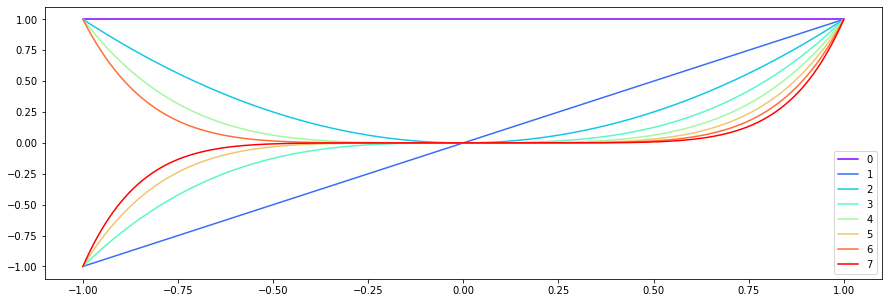

In [14]:
N_x=1000
x  =np.linspace(-1,1,N_x)
y  =np.zeros(N_x,dtype=float)
partition=np.zeros(N_x,dtype=float)

plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

for j in range(0,N):
    #lista=vector[pair[int, 'double']](( (j,1) , (j+1,0)))
    p=eliastocco.polynomial.polynomial['double',1](monomial)
    p.set(j,1);
    x_std= vector['double'](x)
    y=p(x_std)
    #for i in range(0,N_x):        
    #    #y[i]=monomial[j](x[i])        
    #    y[i]=p(x[i])
    
    partition+=y
    plt.plot(x, y , color= next(colors),label=str(j))

plt.legend()
plt.show()

## Differenza tra `float` e `double`

Definisco una base polinomiale: i mononomi fino al grado 7.

Attenzione: definire con il tipo `double` perchè il tipo `float` è diverso da quello usato da numpy, compaiono degli errori di rounding non trascurabili. Proviamo infatti ad usare e vediamo cosa succede.

In [15]:
base=eliastocco.polynomial.monomial_basis['double',1](7)

In [16]:
base.size()

8

Definisco la lista per inizializzare il mio polinomio: $ 2 + x + x^2 + 3 x^4  $

In [17]:
lista=vector[pair[int, 'double']](( (0,2) , (1, 1) , (2,1) , (4,3) ))

Definisco il polinomio rispetto alla base polinomiale dei monomi prima definita

In [18]:
pol=eliastocco.polynomial.polynomial['double'](lista,base)

In [19]:
coeff=pol.coeffs()

In [20]:
for i in coeff:
    print(i.first,":",i.second)

0 : 2.0
1 : 1.0
2 : 1.0
4 : 3.0


In [22]:
import numpy as np
N=1000
x=np.linspace(-10,10,N)
y=np.zeros(N,dtype=float)
check=np.zeros(N,dtype=float)
#check2=np.zeros(N,dtype=float)
y=pol(vector['double'](x))
#for i in range(0,N):
#    y[i]=pol(x[i])
check= 2 + x + pow(x,2) + 3*pow(x,4)

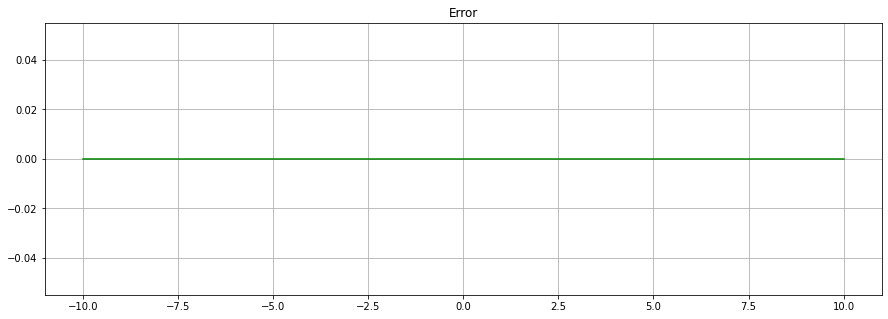

In [26]:
plt.figure ( 0 , figsize = ( 15 , 5 ) )
plt.plot(x, check -y , color = "green")
#plt.plot(x, y , color = "green")
plt.title  ('Error')
plt.grid   ( b = True , which='both' )
plt.show ()

## Monomial basis in 2D

In [27]:
N_monomial_2D_x=3
N_monomial_2D_y=3
init = array['unsigned int',2]()
init[0]=N_monomial_2D_x
init[1]=N_monomial_2D_y
monomial_2D=eliastocco.polynomial.monomial_basis['double',2](init)
N=monomial_2D.size()

In [28]:
monomial_2D.size()

16

In [29]:
N_x=100
N_y=100
x = np.linspace(-1, 1, N_x)
y = np.linspace(-1, 1, N_y)

X, Y = np.meshgrid(x, y)

Y_vect=Y.ravel()
X_vect=X.ravel()

XY = vector[array['double',2]](N_x*N_y)

In [30]:
for i in range(0,len(XY)):
    XY[i][0]=X_vect[i]
    XY[i][1]=Y_vect[i]    

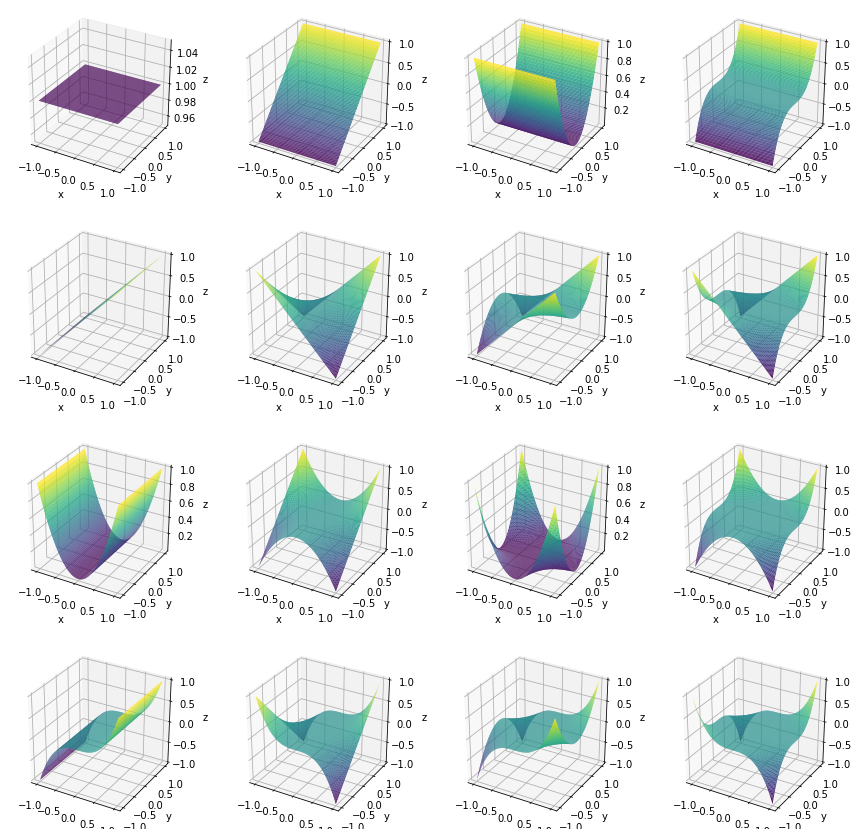

In [31]:
fig = plt.figure(figsize = ( 15 , 15 ))

index = array['unsigned int',2]()
k=1
for index_x in range(N_monomial_2D_x+1):
    for index_y in range(N_monomial_2D_y+1): 
        
        index[0]=index_x
        index[1]=index_y
        
        coeff=cppyy.gbl.std.make_pair(index,1)
        monomial = eliastocco.polynomial.polynomial['double',2]([coeff],monomial_2D)
               
        Z_stl=monomial(XY)
        Z_array=np.array(Z_stl)
        
        Z=Z_array.reshape(N_x,N_y)
        
        ax = fig.add_subplot(N_monomial_2D_x+1, N_monomial_2D_y+1, k, projection='3d')
        k=k+1
        
        ax.plot_surface(X, Y, Z, cmap='viridis',rstride=1, cstride=1)
    
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z');
        
plt.show()

## Vector-valued polynomial

In [32]:
N_dim_Bspline=5

In [33]:
base=eliastocco.polynomial.monomial_basis['double',1](N_dim_Bspline);

In [34]:
type(base)

<class cppyy.gbl.eliastocco.polynomial.basis<double,1> at 0x7fffeee92210>

In [35]:
vect_pol = eliastocco.polynomial.polynomial['double',1,3](base)

In [36]:
coeff_matrix = [ [0.,0.,0.] ,\
                 [1.,2.,-1.],\
                 [-3.,0.,0.5] ]

In [37]:
coeff = array['double',3]()
for i in range(len(coeff_matrix)):
    for j in range(0,3):
        coeff[j]=coeff_matrix[i][j]
    vect_pol.set(i,coeff)

In [38]:
t=np.linspace(0,1,100)

In [43]:
result = vect_pol(vector['double'](t))

In [44]:
N=len(result)
print(N)

100


In [45]:
x=np.empty(N)
y=np.empty(N)
z=np.empty(N)

In [46]:
for i in range(0,N):
    x[i]=result[i][0]
    y[i]=result[i][1]
    z[i]=result[i][2]

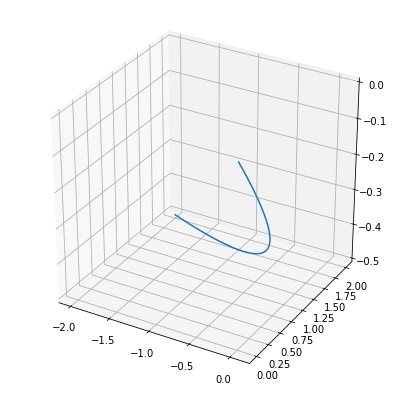

In [47]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
plt.plot(x, y, z)
plt.show()